In [22]:
# Library import
import numpy as np
import random
import matplotlib.pyplot as plt
import inspect


In [23]:
N = 5  # Maximum number of possible peak
Data_size = 200000 

Parameters = np.zeros((Data_size, N, 2))  # Set of Parameters ready
print(Parameters.shape[1])

5


In [24]:
# Lorentzian function that returns sum of multi-Lorentzian function with two arguments
def Lorentzian(x, *args):
    ''' returns sum of Multi-Lorentzian function 
    corresponding to each two arguments (a, b)'''
    a = args[::2]
    b = args[1::2]

    result = 0
    for i in range(len(a)):
        if a[i] > 0 and b[i] > 0:
            if len(a) == len(b):
                result += b[i] / ((x - a[i])**2 + b[i]**2)

    for xx in range(len(result)):
        result[xx] += 0.1* ((np.random.rand()*2) - 1)

    return result 
    # noise = -0.2 ~ 0.2 

In [25]:
# X domain fixed
x = np.arange(-2, 12, 0.01)
print(len(x))

1400


In [26]:
for i in range(len(Parameters)): # For each matrix in Parameter set...

    for j in range(Parameters.shape[1]): # For each raw in each matrix...
        
        # append two argument that will be used in Lorentzian function
        # Second parameter is constrained in range from 0.1 to 0.2
        a = np.random.rand()
        Parameters[i][0] = np.array([[2 * np.random.rand(), 0.1*np.random.rand()+0.1]])
        Parameters[i][1] = np.array([[2+ 2 * np.random.rand(), 0.1*np.random.rand()+0.1]])
        Parameters[i][2] = np.array([[4+ 2 * np.random.rand(), 0.1*np.random.rand()+0.1]])
        Parameters[i][3] = np.array([[6 + 2 * np.random.rand(), 0.1*np.random.rand()+0.1]])
        Parameters[i][4] = np.array([[8 + 2* np.random.rand(), 0.1*np.random.rand()+0.1]])
    
# Check out
print(Parameters)

[[[0.91926377 0.13379479]
  [2.03449412 0.10746232]
  [4.04905386 0.18932545]
  [7.93294072 0.10407773]
  [8.61272175 0.11630634]]

 [[1.64279935 0.1919013 ]
  [2.07643149 0.18220955]
  [5.40162456 0.18514662]
  [6.84233778 0.15747399]
  [8.96688658 0.14014178]]

 [[1.86565001 0.16450852]
  [3.64999204 0.16482786]
  [5.83418154 0.12536109]
  [6.9062328  0.12531006]
  [9.89575403 0.15480571]]

 ...

 [[1.7464563  0.11306572]
  [3.61742374 0.108424  ]
  [5.58701882 0.14100541]
  [7.41671489 0.18209701]
  [8.17867131 0.176416  ]]

 [[0.35524578 0.12654492]
  [2.0705914  0.11398364]
  [4.16552858 0.17419981]
  [6.15456666 0.15818767]
  [8.17663466 0.14079337]]

 [[1.94200679 0.16162007]
  [2.95322482 0.10740337]
  [5.99436479 0.13419869]
  [6.92991167 0.19554572]
  [8.82721224 0.18957848]]]


In [27]:
# ================== Data Generating ================
Data_x = []
Data_y = []

for j in Parameters:  # For each parameter matrix...

    peak = random.randint(1, 5) # Random selection of Possible peak number
    j = list(j.reshape((2*N,))) # reshape processing to put it as *args in function, Since j is matrix

    if peak == 1:
        Data_x.append(Lorentzian(x, *j[0:2]))
        Data_y.append(np.array([j[0], 0, 0, 0, 0]))

    elif peak == 2:
        Data_x.append(Lorentzian(x, *j[0:4]))
        Data_y.append(np.array([j[0],j[2], 0, 0, 0]))

    elif peak == 3:
        Data_x.append(Lorentzian(x, *j[0:6]))
        Data_y.append(np.array([j[0],j[2],j[4],0, 0]))

    elif peak == 4:
        Data_x.append(Lorentzian(x, *j[0:8]))
        Data_y.append(np.array([j[0],j[2],j[4],j[6], 0]))

    elif peak == 5:
        Data_x.append(Lorentzian(x, *j[0:]))
        Data_y.append(np.array([j[0],j[2],j[4],j[6],j[8]]))

# 피크 사이의 간격을 일정하게 고의적으로 넓힌 상태에서는 그럭저럭 잘 인식....
# 하지만 random하게 0~10범위에서 만들고, overlapping을 허용한다면..?


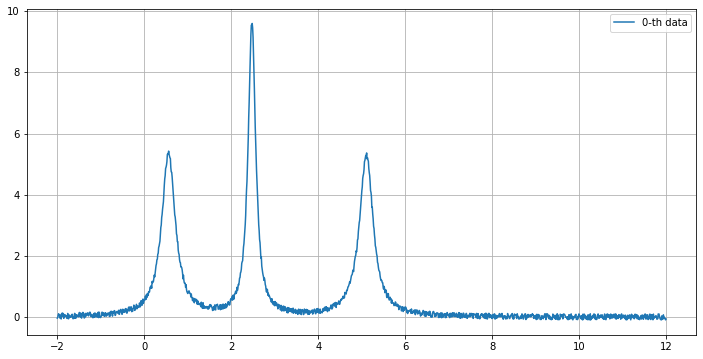

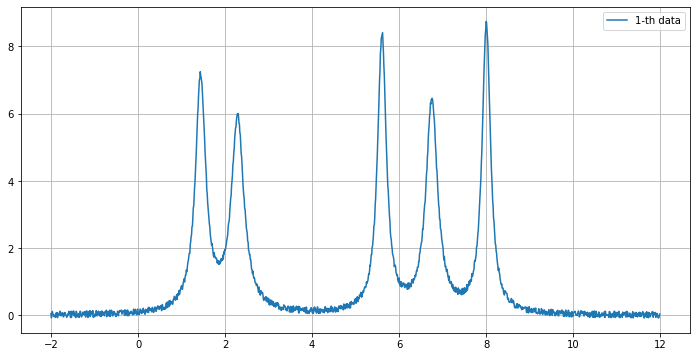

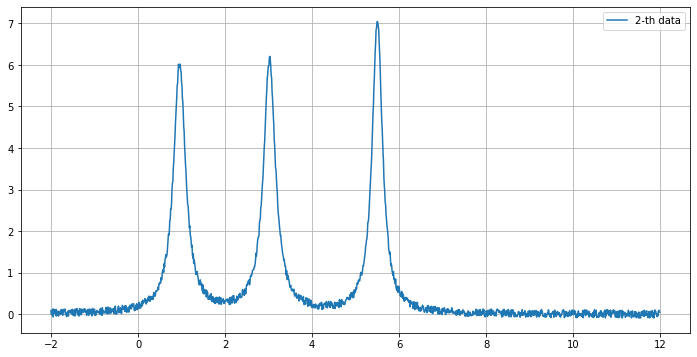

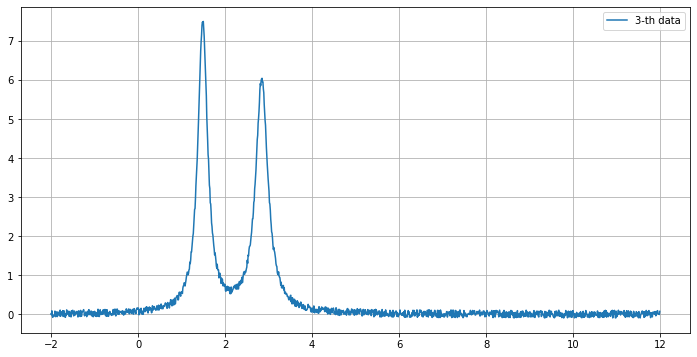

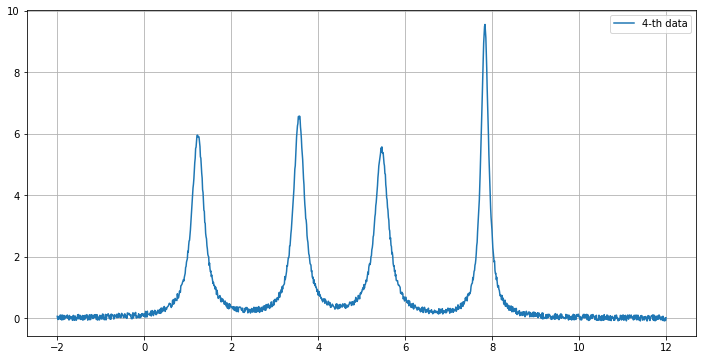

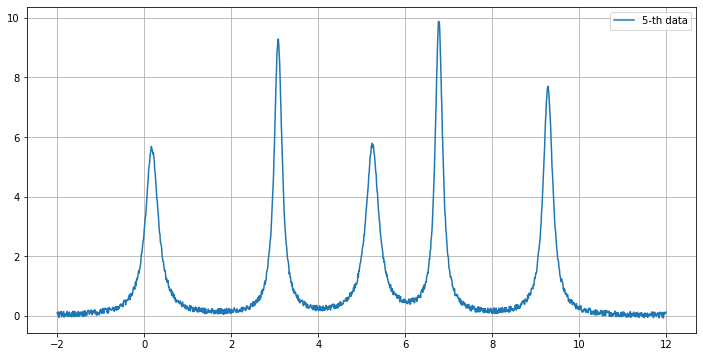

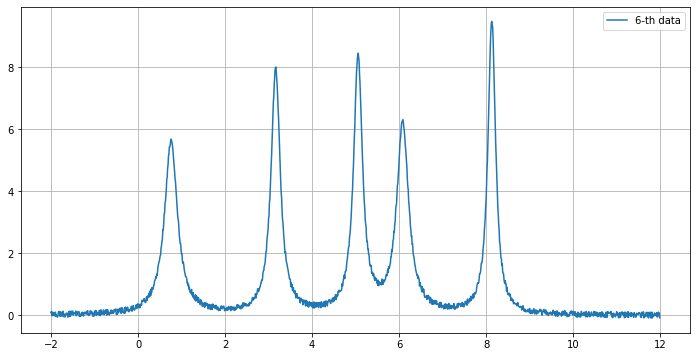

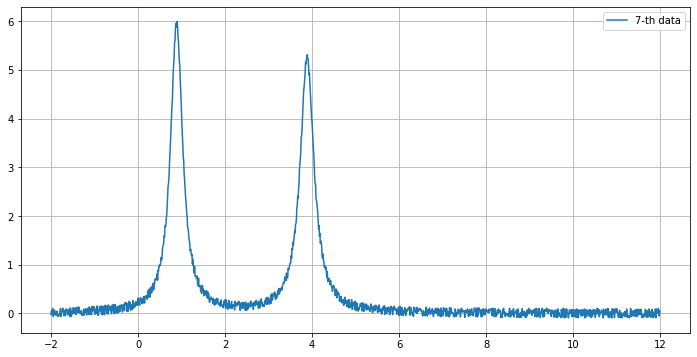

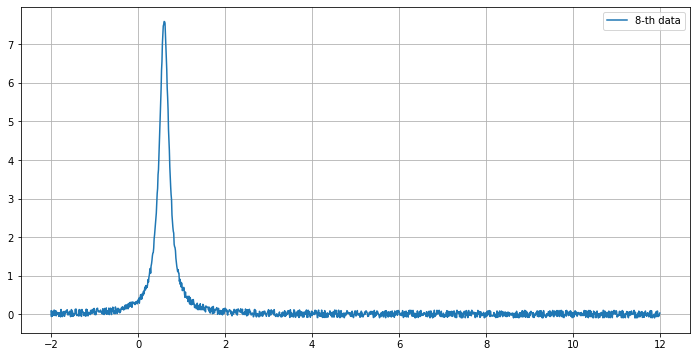

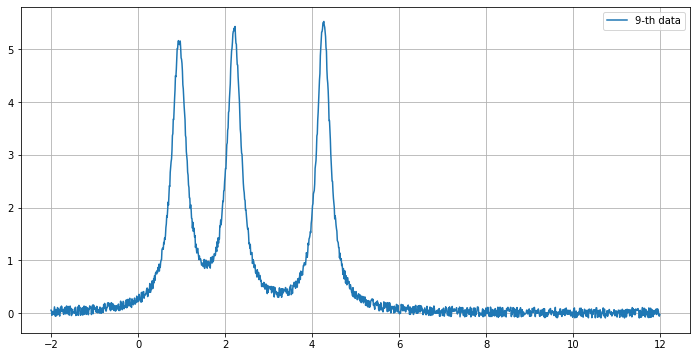

In [ ]:
# Generated Data sample check!
# plt.figure(figsize=(12, 6))

for i in range(10):
    plt.figure(figsize=(12,6))
    plt.plot(x, Data_x[i], label = str(i) + '-th data')
    plt.legend()
    plt.grid('on')

In [ ]:
# 이 시점에서 데이터 저장
# 만들어진 데이터는 0~10 범위에서 최대 5개의 peak갖고, overlapping 가능한 그래프
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
cd gdrive

/gdrive


In [ ]:
cd My Drive

/gdrive/My Drive


In [ ]:
ls

'1. BackUp'/  '2. Peak Detection 연구진행중'/  'C언어 코딩도장'/


In [ ]:
Data_x = np.array(Data_x)
Data_y = np.array(Data_y)

print(Data_x.shape)
print(Data_y.shape)

(200000, 1200)
(200000, 10)


In [ ]:
np.savetxt("Data_x", Data_x)
np.savetxt("Data_y", Data_y)

KeyboardInterrupt: ignored

In [ ]:
ls

In [ ]:
# Data spliting up into three group : training/validation/test

train_data = np.array(Data_x[:100000])
val_data = np.array(Data_x[100000:150000])
test_data = np.array(Data_x[150000:])

train_labels = np.array(Data_y[:100000])
val_labels = np.array(Data_y[100000:150000])
test_labels = np.array(Data_y[150000:])

In [ ]:
# size test

print(train_data.shape, train_labels.shape)
print(val_data.shape, val_labels.shape)
print(test_data.shape, test_labels.shape)

(100000, 1400) (100000, 5)
(50000, 1400) (50000, 5)
(50000, 1400) (50000, 5)


In [ ]:
# reshape for Image-form setting
# 2차원일때만!
#train_data = train_data.reshape(100000, 20, 20, 1)
#val_data = val_data.reshape(150000, 20, 20, 1)
#test_data = test_data.reshape(50000, 20, 20, 1)


In [ ]:
# reshape for Image-form setting
# 1차원일때 변환
train_data = train_data.reshape(100000, len(x), 1)
val_data = val_data.reshape(50000, len(x), 1)
test_data = test_data.reshape(50000, len(x), 1)


In [ ]:
# From Here on, let`s start to make Convolution Neural Network!
# Library import
# Shared Input Layer
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D, GlobalMaxPooling1D
from keras.layers.merge import concatenate

# input layer
main_inputs = Input(shape=(len(x),1))

# first feature extractor
x_conv1 = Conv1D(64, kernel_size=100, activation='relu')(main_inputs)
x_pooling1 = MaxPooling1D(pool_size=(2))(x_conv1)
x_conv2 = Conv1D(32, 50, activation='relu')(x_pooling1)
x_pooling2 = MaxPooling1D(pool_size=(2))(x_conv2)
x_conv3 = Conv1D(16, 25, activation='relu')(x_pooling2)
x_pooling3 = MaxPooling1D(pool_size=(2))(x_conv3)

#flat1 = Flatten()(pool1)
x_GMpooling = GlobalMaxPooling1D()(x_pooling3)
x_dense = Dense(50, activation ='relu')(x_GMpooling)
output1 = Dense(5, activation = 'linear')(x_dense)

model = Model(inputs=main_inputs, outputs=output1)

# summarize layers
print(model.summary())


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 1400, 1)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 1301, 64)          6464      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 650, 64)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 601, 32)           102432    
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 300, 32)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 276, 16)           12816     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 138, 16)           0   

In [ ]:
model.compile(loss='mse', metrics=['mae'], optimizer='adam')


In [ ]:
%%time
hist2 = model.fit(train_data, train_labels, 
                   epochs=30, 
                   batch_size=2000,
                   validation_data=(val_data, val_labels), verbose=1)

Train on 100000 samples, validate on 50000 samples
Epoch 1/30
 92000/100000 [==========================>...] - ETA: 1:43 - loss: 4.9239 - mae: 1.6457

KeyboardInterrupt: ignored

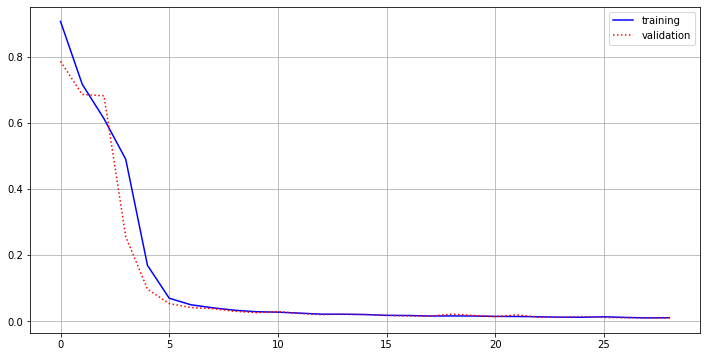

In [ ]:
# Loss plot
plt.figure(figsize=(12, 6))
plt.plot(hist2.history['loss'][1:], 'b-', label="training")
plt.plot(hist2.history['val_loss'][1:], 'r:', label="validation")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
predict = model2.predict(test_data)
predict.shape

(50000, 10)

In [ ]:
for i in range(10):
    print(predict[i])
    print(test_labels[i])
    print('==============')

[ 4.4355822e-01  1.2859252e-01  1.8994656e+00  1.4262317e-01
  1.7902167e-03  3.0359300e-03  1.9190570e-02  2.5528861e-02
  3.0344505e-02 -1.3189448e-02]
[0.40950781 0.12256962 1.90950781 0.1256241  0.         0.
 0.         0.         0.         0.        ]
[0.3710242  0.19358847 1.8123201  0.13145907 3.29425    0.12567654
 4.8879676  0.17014004 6.5074472  0.06628452]
[0.37077792 0.12795291 1.87077792 0.10084041 3.37077792 0.11243643
 4.87077792 0.14885828 6.37077792 0.17742038]
[ 0.66720074  0.14821169  2.1360862   0.16228054  3.684138    0.18081704
  5.1452856   0.09444536 -0.06561241 -0.02237119]
[0.66740189 0.18209104 2.16740189 0.1365965  3.66740189 0.16440427
 5.16740189 0.10998931 0.         0.        ]
[0.24586135 0.12347588 1.7528412  0.12314425 3.16532    0.09942142
 4.5429387  0.16619422 6.2578506  0.14257322]
[0.20258055 0.14085573 1.70258055 0.14083567 3.20258055 0.16151122
 4.70258055 0.12348957 6.20258055 0.1610241 ]
[0.9869017  0.10584852 2.46644    0.18011199 3.908953

In [ ]:
def simple(x, *args):
    ''' returns sum of Multi-Lorentzian function 
    corresponding to each two arguments (a, b)'''
    a = args[::2]
    b = args[1::2]

    result = 0
    for i in range(len(a)):
        if a[i] > 0 and b[i] > 0:
            if len(a) == len(b):
                result += b[i] / ((x - a[i])**2 + b[i]**2)

    return result 

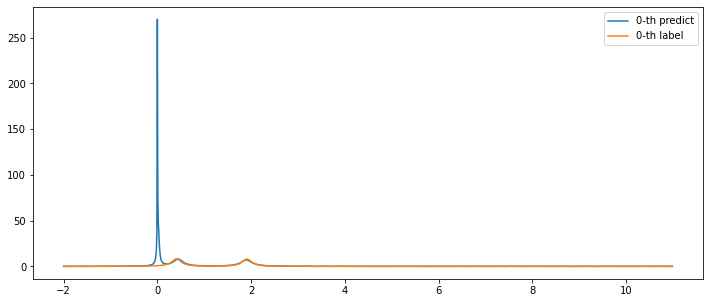

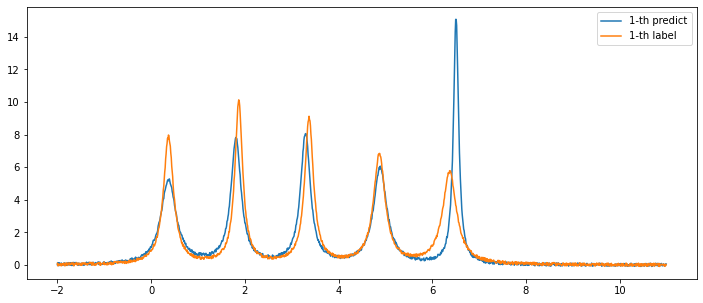

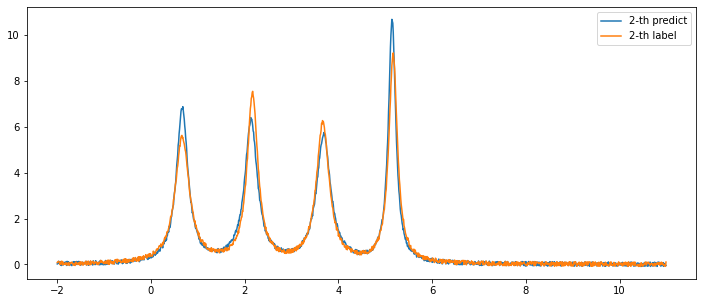

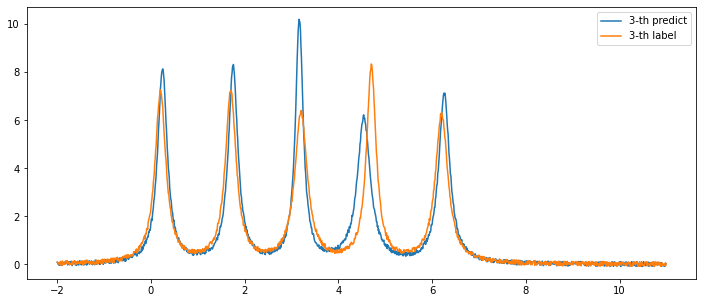

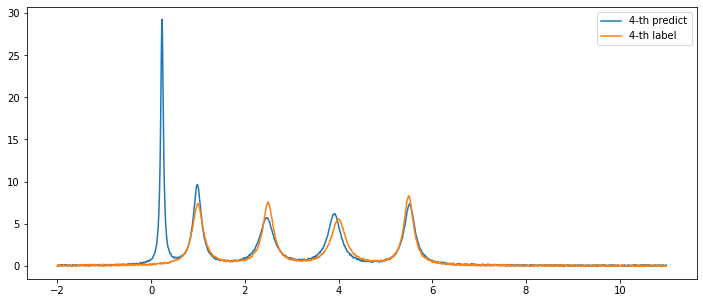

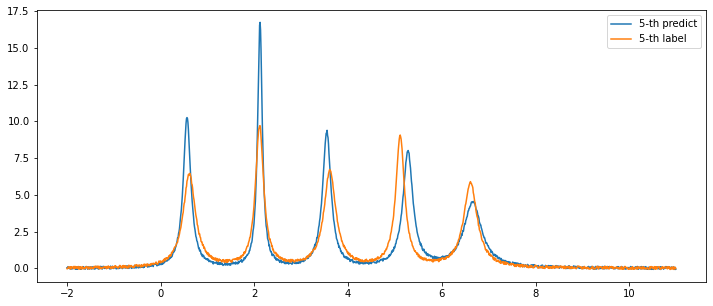

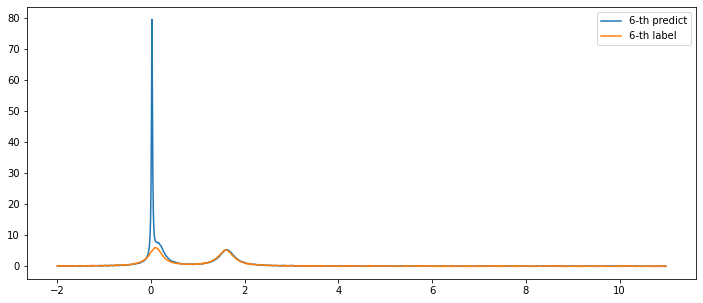

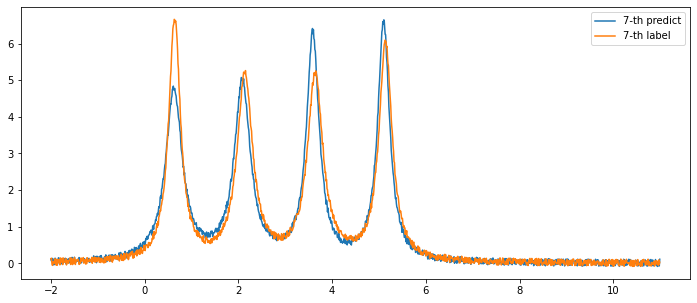

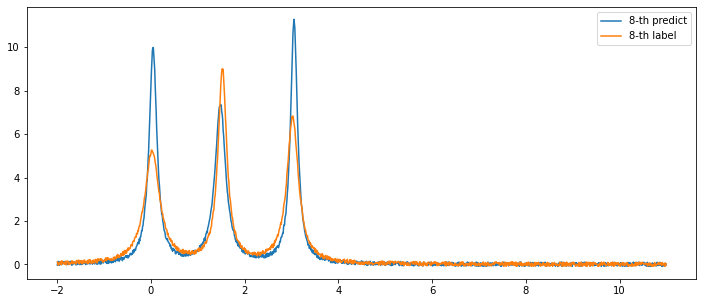

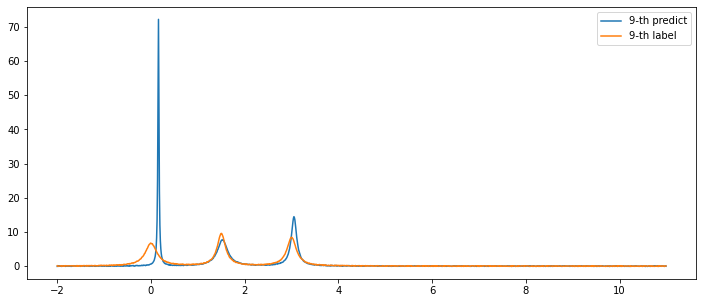

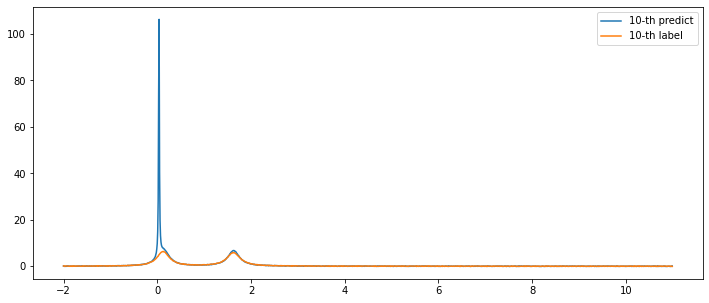

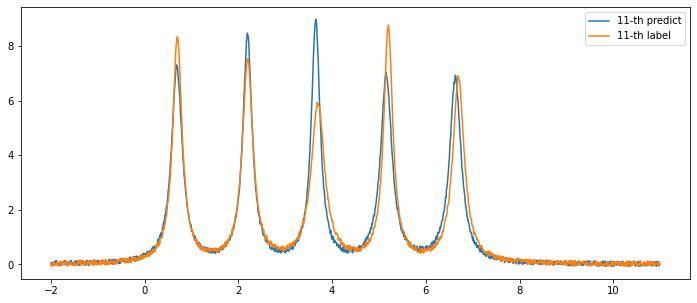

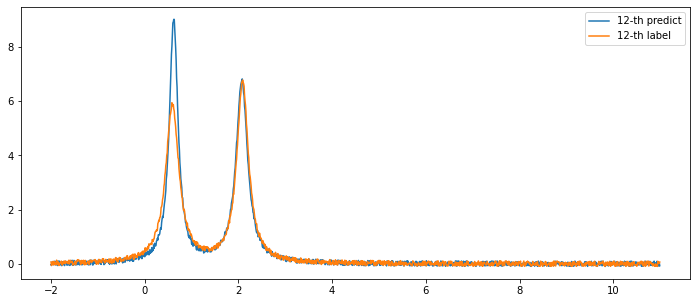

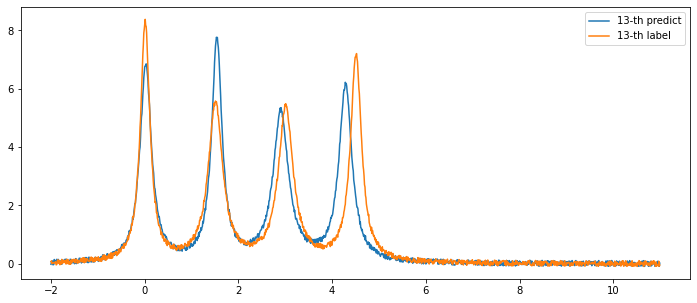

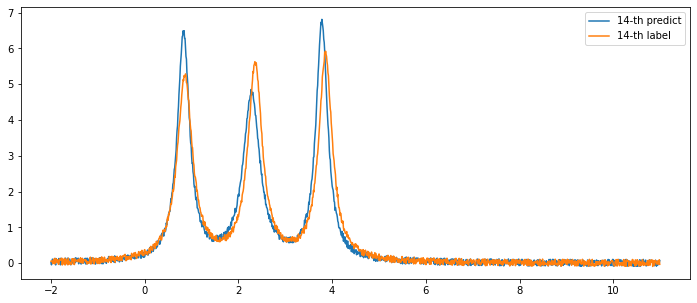

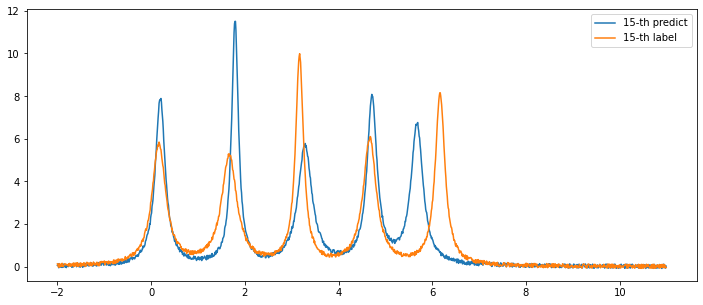

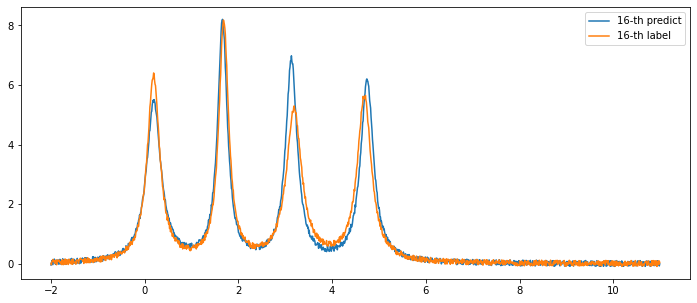

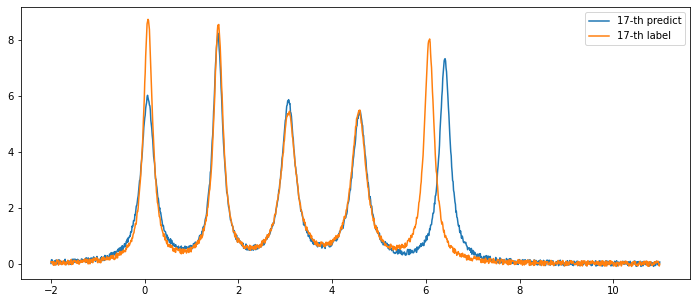

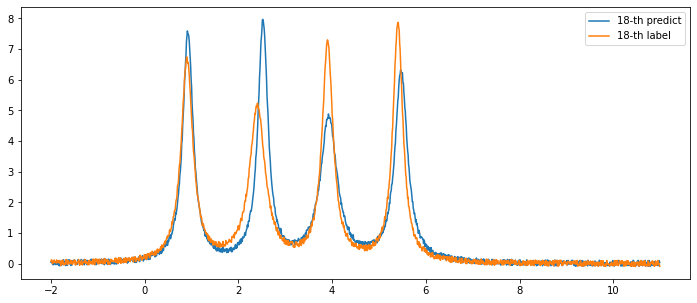

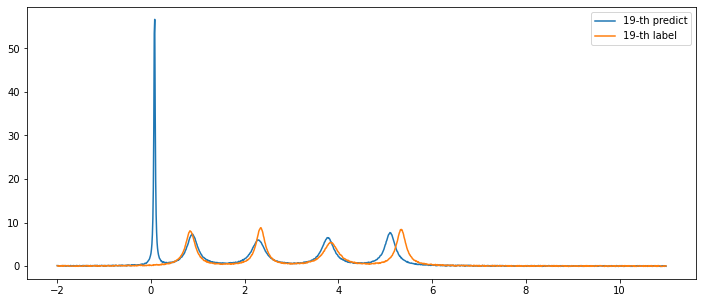

In [ ]:
for i in range(20):
    plt.figure(figsize=(12,5))
    plt.plot(x, Lorentzian(x, *list(predict[i])), label=str(i)+'-th predict')
    plt.plot(x, test_data[i], label=str(i)+'-th label')
    #plt.plot(x, simple(x, *list(predict[i])), label=str(i)+'-th exact')
    plt.legend()
    plt.show()

In [ ]:
# Check the architecture of the CNN
print(model2.layers[0])
print(model2.layers[1])
print(model2.layers[2])
print(model2.layers[3])
print(model2.layers[4])
print(model2.layers[5])
print(model2.layers[6])
print(model2.layers[7])
print(model2.layers[8])



In [ ]:
for i in range(9):
    print(str(i) +'-th layer :', len(model2.layers[i].get_weights()))

0-th layer : 2
1-th layer : 0
2-th layer : 2
3-th layer : 0
4-th layer : 2
5-th layer : 0
6-th layer : 0
7-th layer : 2
8-th layer : 2


In [ ]:
layer_0 = model2.layers[0].get_weights()

layer_2 = model2.layers[2].get_weights()

layer_4 = model2.layers[4].get_weights()

layer_5 = model2.layers[5].get_weights()

layer_6 = model2.layers[6].get_weights()



In [ ]:
# 첫번째 컨볼루션 필터
filter_0 = layer_0[0]
filter_0.shape # 16개의 필터가 커널사이즈 10으로 존재함

(100, 1, 64)

In [ ]:
# 2번째 컨볼루션 필터
filter_2 = layer_2[0]
filter_2.shape

(60, 64, 32)

In [ ]:
# 완전연결층
layer_2[1].shape

(32,)

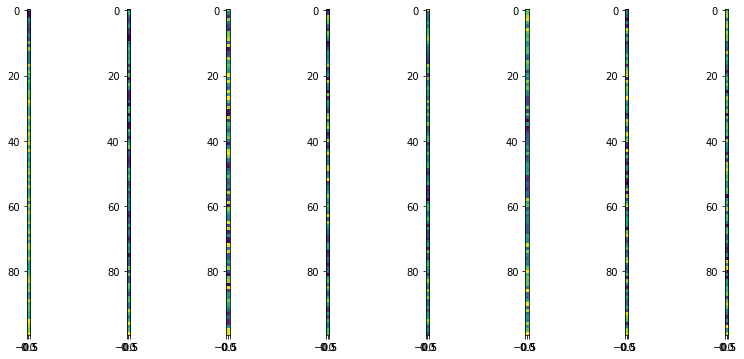

In [ ]:
# 첫번째 컨볼루션 필터 시각화
M = 8
plt.figure(figsize=(14, 6))

for i in range(M):  
    plt.subplot(1, M, i + 1)  # Subplot : from 1 to 8
    plt.imshow(filter_0[ :, :,i]) # 1st-conv filter showing
    plt.grid(False)

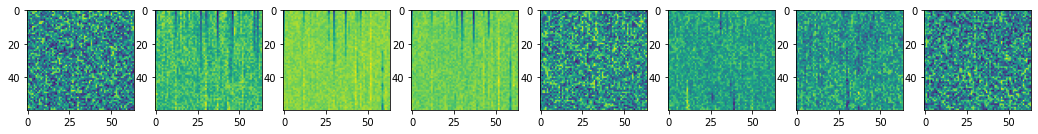

In [ ]:
# 두번째 컨볼루션 필터 시각화
M = 8
plt.figure(figsize=(18, 6))

for i in range(M):
    plt.subplot(1, M, i + 1)  # Subplot from 1 to 8
    plt.imshow(filter_2[:, :, i]) # (10, 16) filter showing -> (10, 16) = (10, 1)filter * 16
    plt.grid(False)

In [ ]:
# 각각의 레이어에서의 출력을 확인하기
import tensorflow.keras.backend as K

# Outputs of each layers
f0 = K.function([model2.input], [model2.layers[0].output])
f1 = K.function([model2.input], [model2.layers[1].output])
f2 = K.function([model2.input], [model2.layers[2].output])
f3 = K.function([model2.input], [model2.layers[3].output])
f4 = K.function([model2.input], [model2.layers[4].output])
f5 = K.function([model2.input], [model2.layers[5].output])
f6 = K.function([model2.input], [model2.layers[6].output])
f7 = K.function([model2.input], [model2.layers[7].output])


In [ ]:
n = 0
x = train_data[n:n+1]

print(x.shape)

(1, 1300, 1)


Text(0.5, 1, 'Input data')

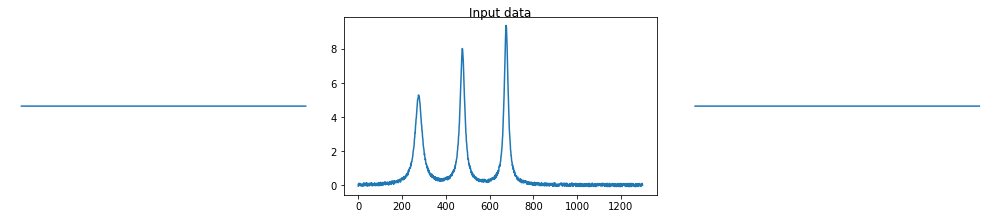

In [ ]:
plt.figure(figsize=(14, 3))  # Figure generated

for i in range(3): 
    plt.subplot(1, 3, i + 1)  # three Subplot generated
    if i == 1:                # center plot
        plt.plot(x[0])        # image showed
    else:  
        plt.plot(np.zeros_like(x[0]))  # zero image
        plt.axis("off")
plt.tight_layout()
plt.suptitle("Input data", y=1)
# one image showing at center 

In [ ]:
# 1번째 컨볼루션 층 출력결과
z0 = f0([x])[0]
z0.shape

(1, 1201, 64)

Text(0.5, 1.1, 'After 1st Conv1D filter')

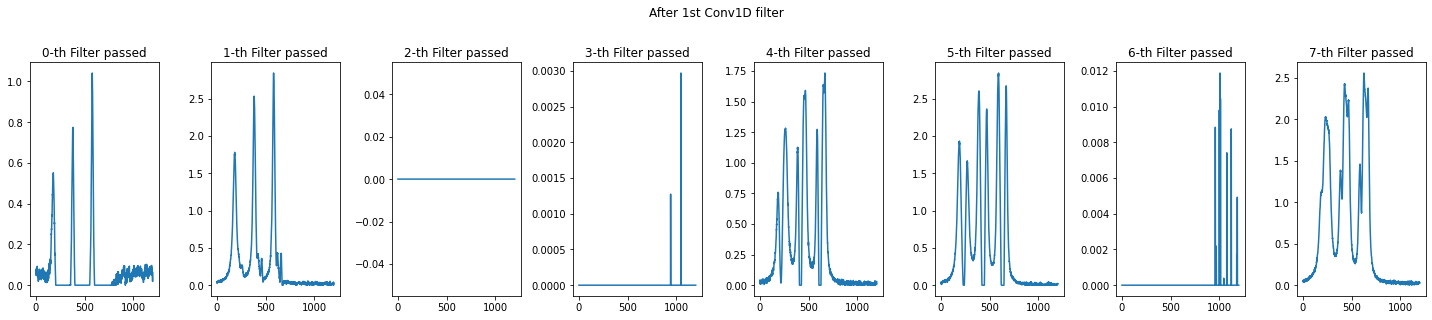

In [ ]:
plt.figure(figsize=(20, 4))

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.plot(z0[0, :, i])
    plt.axis('on')
    
    plt.title("{}-th Filter passed".format(i))
plt.tight_layout()
plt.suptitle("After 1st Conv1D filter", y=1.1)

In [ ]:
# 2번째 맥스풀링층 출력 결과
z1 = f1([x])[0]
print(z1.shape)


(1, 600, 64)


Text(0.5, 1.1, 'After MaxPooling1D')

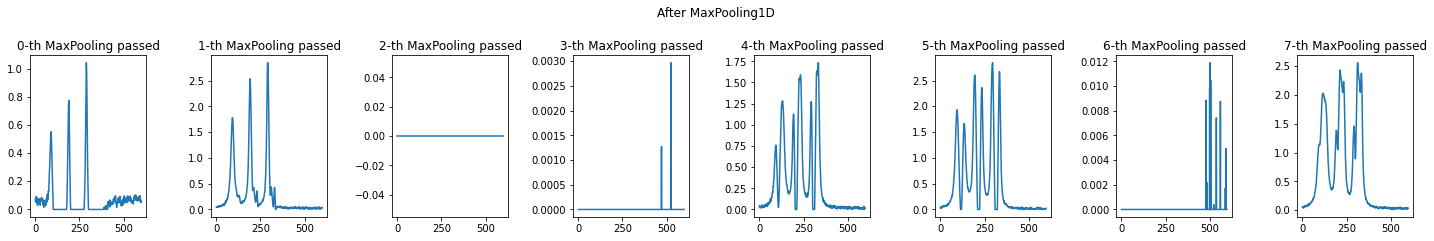

In [ ]:
plt.figure(figsize=(20, 3))

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.plot(z1[0, :, i])
    
    plt.title("{}-th MaxPooling passed".format(i))
plt.tight_layout()
plt.suptitle("After MaxPooling1D", y=1.1)
        

In [ ]:
# 3번째 컨볼루션 층 출력결과
z2 = f2([x])[0]
print(z2.shape)

(1, 541, 32)


Text(0.5, 1.1, 'After 2nd Conv1D')

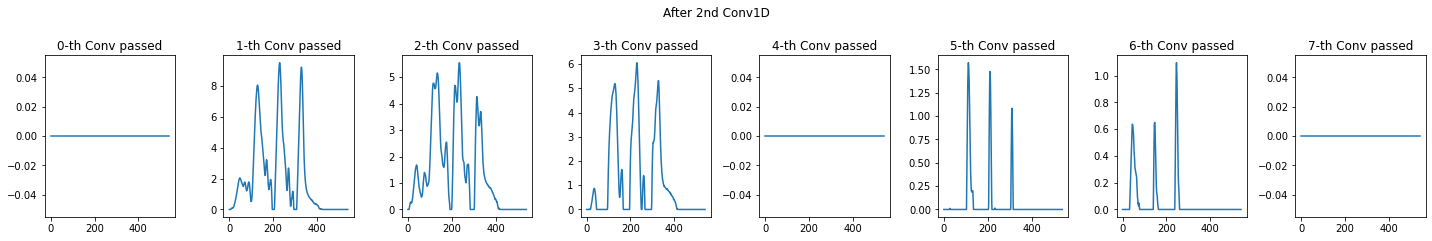

In [ ]:
plt.figure(figsize=(20, 3))

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.plot(z2[0, :, i])
    
    plt.title("{}-th Conv passed".format(i))
plt.tight_layout()
plt.suptitle("After 2nd Conv1D", y=1.1)

In [ ]:
# 4번째 MaxPooling 층 출력결과
z3 = f3([x])[0]
print(z3.shape)

(1, 270, 32)


Text(0.5, 1.1, 'After 2nd MaxPooling')

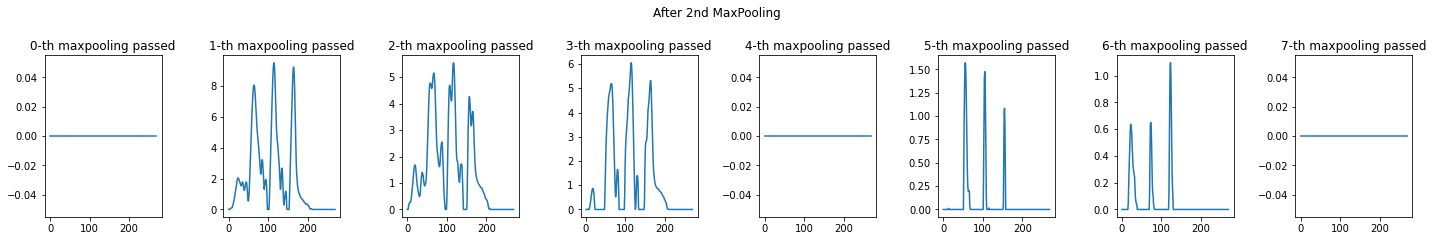

In [ ]:
plt.figure(figsize=(20, 3))

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.plot(z3[0, :, i])
    
    plt.title("{}-th maxpooling passed".format(i))
plt.tight_layout()
plt.suptitle("After 2nd MaxPooling", y=1.1)

In [ ]:
# 5번째층 GlobalMaxPooling층 출력 결과
z4 = f4([x])[0]
print(z4.shape)
print(z4)

(1, 231, 32)
[[[2.204544   0.         0.         ... 0.         1.6181899  0.        ]
  [2.2299318  0.         0.         ... 0.         1.4312189  0.        ]
  [2.2264311  0.         0.         ... 0.         1.3240132  0.        ]
  ...
  [0.         0.         0.20716847 ... 0.         0.         2.8600745 ]
  [0.         0.         0.2101673  ... 0.         0.         2.8570542 ]
  [0.         0.         0.21045625 ... 0.         0.         2.852913  ]]]


TypeError: ignored

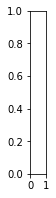

In [ ]:
plt.figure(figsize=(10, 3))
plt.imshow(z4, aspect=10)
plt.xticks([]); plt.yticks([]); plt.grid(False)
plt.title("vectorizing")

In [ ]:
# 6번째층 Dense Layer(Fully Connected Layer) 출력 결과
z5 = f5([x])[0]
print(z5.shape)

plt.figure(figsize=(12, 4))
plt.imshow(z5)
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(z5[0])
plt.show()

In [ ]:
# 7번째 Dropout 층 출력 결과
z6 = f6([x])[0]
print(z6.shape)

plt.figure(figsize=(12, 4))
plt.imshow(z6)
plt.show()


plt.figure(figsize=(12, 4))
plt.plot(z6[0])
plt.show()

In [ ]:
# 8번째 최종출력층 출력 결과
z7 = f7([x])[0]
print(z7)

plt.figure(figsize=(10,2))
plt.imshow(z7)
plt.show()

In [ ]:
# 1차원 데이터에 대응되는 라벨은 뭘로? => 적분값과 peak 수는 안정적인 라벨로 작용, 하지만 목적에 안맞는다.
# 라벨 -> 원래 의도대로 mean position, width로 되돌림
# 로렌치안 함수 정의에 약간의 오류 발견 -> 수정, 재시도하였음
# 이전보다 상당히 나아진 듯, 

# 해석하기 어려운 것
# 각 컨볼루션 층에서의 필터가 의미하는 것?? -> 시각화해도 의미를 설명하기 어렵다.
# 각각의 레이어의 정보를 완전히 표현하는 방법 좀 더 공부..